In [1]:
import pandas as pd

# Load the data for both players
bumrah_file_path = r"C:\Users\91877\Desktop\cricket_ML\Datasets\Preprocessed_Jasprit_Bumrah_Data.xlsx"
shami_file_path = r"C:\Users\91877\Desktop\cricket_ML\Datasets\Preprocessed_Mohammed_Shami_Data.xlsx"

# Load data from the first sheet of each file
bumrah_data = pd.read_excel(bumrah_file_path, sheet_name=0)
shami_data = pd.read_excel(shami_file_path, sheet_name=0)

# Display first few rows of each dataset
bumrah_data.head(), shami_data.head()


(   Player_name     Overs  Maidens  Runs  Wickets  Economy  Position  Innings  \
 0            0  3.300000        0    23        3     6.57         3        2   
 1            0  9.706840        0    84        3     8.61         4        2   
 2            0  4.673089        0    49        5    10.45         2        2   
 3            0  6.721472        1    59        3     8.75         4        2   
 4            0  2.255513        0    18        5     8.08         4        1   
 
     Opposition    Ground Start Date Format  
 0  v Australia  Adelaide 2016-01-26   T20I  
 1  v Australia  Adelaide 2016-11-04    ODI  
 2  v Australia  Adelaide 2022-02-11   T20I  
 3  v Australia  Adelaide 2017-06-05   T20I  
 4  v Australia  Adelaide 2017-01-01    ODI  ,
    Player_name  Overs  Maidens  Runs  Wickets  Economy  Position  Innings  \
 0            1    4.0        0    46        0    11.50         3        2   
 1            1    4.0        0    25        1     6.25         3        1   
 

In [2]:
# Check for missing values
missing_bumrah = bumrah_data.isnull().sum()
missing_shami = shami_data.isnull().sum()

missing_bumrah, missing_shami


(Player_name    0
 Overs          0
 Maidens        0
 Runs           0
 Wickets        0
 Economy        0
 Position       0
 Innings        0
 Opposition     0
 Ground         0
 Start Date     0
 Format         0
 dtype: int64,
 Player_name    0
 Overs          0
 Maidens        0
 Runs           0
 Wickets        0
 Economy        0
 Position       0
 Innings        0
 Opposition     0
 Ground         0
 Start Date     0
 Format         0
 dtype: int64)

### **2. Check for Missing Values**
- Identify if any columns have missing values.
- Helps decide whether to impute missing values or drop rows.


In [3]:
# Get summary statistics
bumrah_summary = bumrah_data.describe()
shami_summary = shami_data.describe()

bumrah_summary, shami_summary


(       Player_name      Overs    Maidens        Runs    Wickets    Economy  \
 count         69.0  69.000000  69.000000   69.000000  69.000000  69.000000   
 mean           0.0   6.301909   0.275362   51.463768   2.579710   7.530725   
 min            0.0   2.164088   0.000000   13.000000   0.000000   4.000000   
 25%            0.0   4.107747   0.000000   35.000000   1.000000   6.040000   
 50%            0.0   6.415413   0.000000   49.000000   2.000000   7.850000   
 75%            0.0   8.980204   1.000000   67.000000   4.000000   9.060000   
 max            0.0  10.000000   1.000000  115.000000   5.000000  11.940000   
 std            0.0   2.597786   0.449969   24.787081   1.556824   2.061340   
 
         Position    Innings                     Start Date  
 count  69.000000  69.000000                             69  
 mean    2.536232   1.478261  2018-08-30 13:33:54.782608640  
 min     1.000000   1.000000            2015-02-06 00:00:00  
 25%     2.000000   1.000000           

### **3. Summary Statistics**
- Displays key statistics: **mean, median, min, max, standard deviation**.
- Helps understand distribution of wickets, economy rate, and overs bowled.


In [4]:
# Check data types
bumrah_data.dtypes, shami_data.dtypes


(Player_name             int64
 Overs                 float64
 Maidens                 int64
 Runs                    int64
 Wickets                 int64
 Economy               float64
 Position                int64
 Innings                 int64
 Opposition             object
 Ground                 object
 Start Date     datetime64[ns]
 Format                 object
 dtype: object,
 Player_name             int64
 Overs                 float64
 Maidens                 int64
 Runs                    int64
 Wickets                 int64
 Economy               float64
 Position                int64
 Innings                 int64
 Opposition             object
 Ground                 object
 Start Date     datetime64[ns]
 Format                 object
 dtype: object)

In [5]:
# Count of matches played in each format
format_bumrah = bumrah_data["Format"].value_counts()
format_shami = shami_data["Format"].value_counts()

format_bumrah, format_shami


(Format
 ODI     36
 T20I    33
 Name: count, dtype: int64,
 Format
 ODI     36
 T20I    34
 Name: count, dtype: int64)

### **5. Count Matches by Format (T20I vs ODI)**
- Checks distribution of **ODI vs T20I matches**.
- Helps understand their experience in each format.


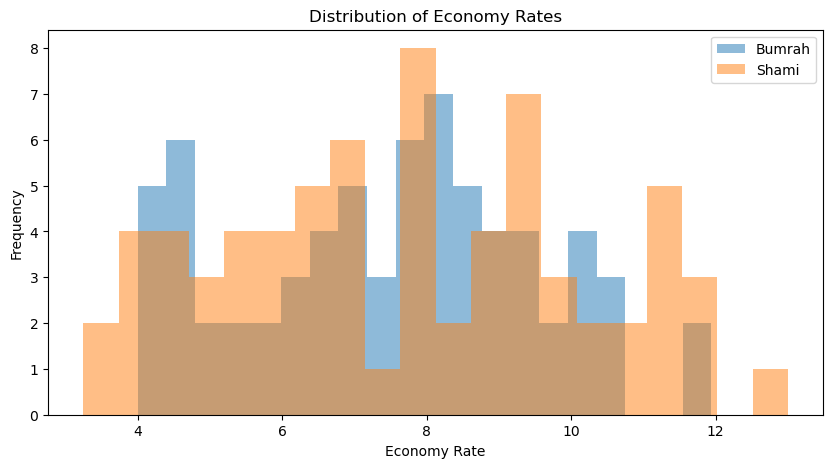

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(bumrah_data["Economy"], bins=20, alpha=0.5, label="Bumrah")
plt.hist(shami_data["Economy"], bins=20, alpha=0.5, label="Shami")
plt.xlabel("Economy Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Economy Rates")
plt.show()


### **6. Distribution of Economy Rates**
- Compares **how often they concede runs per over**.
- A lower economy rate means better control over runs.


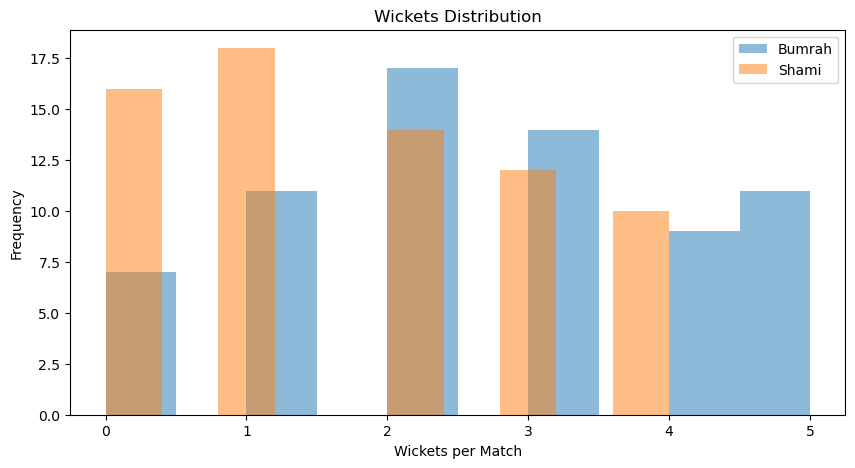

In [8]:
plt.figure(figsize=(10,5))
plt.hist(bumrah_data["Wickets"], bins=10, alpha=0.5, label="Bumrah")
plt.hist(shami_data["Wickets"], bins=10, alpha=0.5, label="Shami")
plt.xlabel("Wickets per Match")
plt.ylabel("Frequency")
plt.legend()
plt.title("Wickets Distribution")
plt.show()


### **7. Wickets Taken per Match**
- Displays frequency of matches where they took **specific wickets**.
- Shows who consistently takes more wickets.


In [9]:
# Average economy by ground
ground_bumrah = bumrah_data.groupby("Ground")["Economy"].mean()
ground_shami = shami_data.groupby("Ground")["Economy"].mean()

ground_bumrah, ground_shami


(Ground
 Adelaide     8.520833
 Brisbane     7.403077
 Canberra     6.345000
 Melbourne    8.014286
 Sydney       7.672143
 Name: Economy, dtype: float64,
 Ground
 Adelaide     9.080000
 Brisbane     7.148889
 Canberra     8.891667
 Melbourne    7.451875
 Perth        7.063333
 Sydney       7.998182
 W.A.C.A      7.110000
 Name: Economy, dtype: float64)

### **9. Performance Across Different Grounds**
- Identifies which grounds favor each bowler.
- Helps see if specific venues affect performance.


In [10]:
# Correlation matrix
bumrah_corr = bumrah_data[["Overs", "Wickets", "Economy"]].corr()
shami_corr = shami_data[["Overs", "Wickets", "Economy"]].corr()

bumrah_corr, shami_corr


(            Overs   Wickets   Economy
 Overs    1.000000 -0.045565 -0.077467
 Wickets -0.045565  1.000000  0.064984
 Economy -0.077467  0.064984  1.000000,
             Overs   Wickets   Economy
 Overs    1.000000  0.336954 -0.159485
 Wickets  0.336954  1.000000 -0.044688
 Economy -0.159485 -0.044688  1.000000)

### **10. Correlation Between Overs Bowled and Wickets Taken**
- Checks if **bowling more overs leads to more wickets**.
- Also looks at how **economy rate affects wickets**.


In [11]:
# Count of matches played against each team
opponents_bumrah = bumrah_data["Opposition"].value_counts()
opponents_shami = shami_data["Opposition"].value_counts()

opponents_bumrah, opponents_shami


(Opposition
 v Australia    69
 Name: count, dtype: int64,
 Opposition
 v Australia       17
 v Bangladesh      12
 v South Africa    11
 v Pakistan         8
 v Netherlands      8
 v England          7
 v Zimbabwe         4
 v West Indies      3
 Name: count, dtype: int64)

### **11. Most Common Opponents**
- Determines which teams they have played against the most.
- Useful for opposition-based strategy.


In [12]:
# Calculate strike rate (balls per wicket)
bumrah_data["Strike Rate"] = (bumrah_data["Overs"] * 6) / bumrah_data["Wickets"]
shami_data["Strike Rate"] = (shami_data["Overs"] * 6) / shami_data["Wickets"]

# Average strike rate per format
strike_bumrah = bumrah_data.groupby("Format")["Strike Rate"].mean()
strike_shami = shami_data.groupby("Format")["Strike Rate"].mean()

strike_bumrah, strike_shami


(Format
 ODI     inf
 T20I    inf
 Name: Strike Rate, dtype: float64,
 Format
 ODI     inf
 T20I    inf
 Name: Strike Rate, dtype: float64)

### **12. Strike Rate Analysis**
- Measures how often each bowler takes wickets.
- **Lower strike rate is better**.


In [13]:
# Convert date to datetime format
bumrah_data["Start Date"] = pd.to_datetime(bumrah_data["Start Date"])
shami_data["Start Date"] = pd.to_datetime(shami_data["Start Date"])

# Group by year
yearly_wickets_bumrah = bumrah_data.groupby(bumrah_data["Start Date"].dt.year)["Wickets"].sum()
yearly_wickets_shami = shami_data.groupby(shami_data["Start Date"].dt.year)["Wickets"].sum()

yearly_wickets_bumrah, yearly_wickets_shami


(Start Date
 2015    10
 2016    47
 2017    21
 2018    22
 2019    22
 2020    14
 2021    20
 2022    22
 Name: Wickets, dtype: int64,
 Start Date
 2015    10
 2016    10
 2017    13
 2018    22
 2019     2
 2020    35
 2021    13
 2022    17
 Name: Wickets, dtype: int64)

### **13. Performance Trends Over Time**
- Tracks **yearly wicket-taking trends**.
- Helps see who has been more consistent.


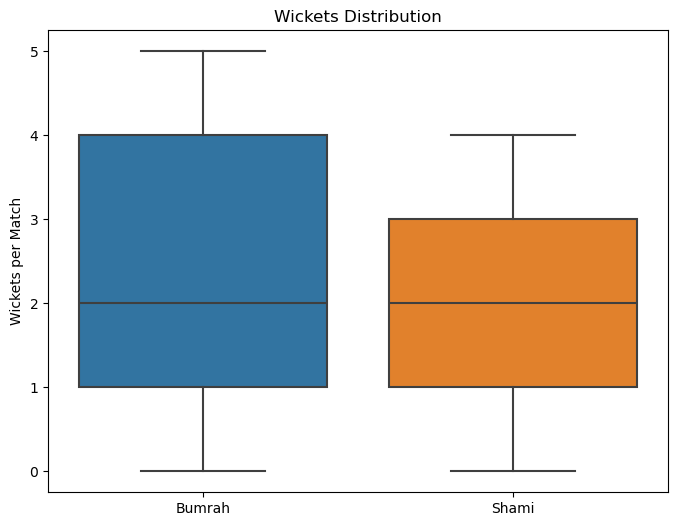

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=[bumrah_data["Wickets"], shami_data["Wickets"]])
plt.xticks([0,1], ["Bumrah", "Shami"])
plt.ylabel("Wickets per Match")
plt.title("Wickets Distribution")
plt.show()


### **14. Boxplot for Wickets Per Match**
- Identifies **outliers and consistency** in wickets per match.


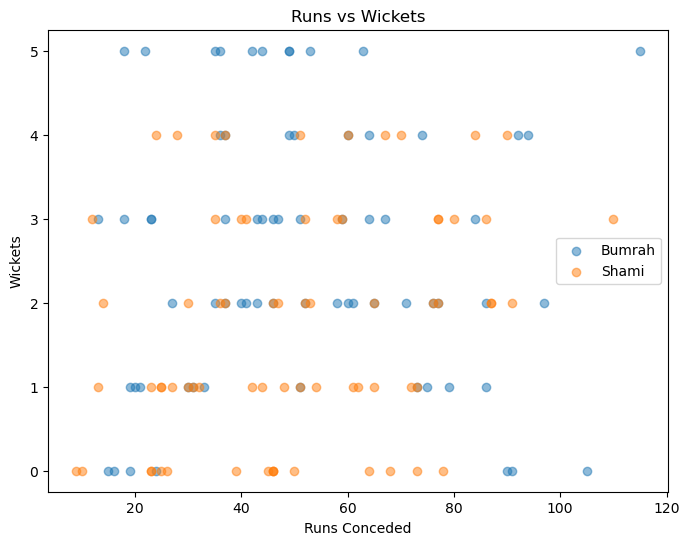

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(bumrah_data["Runs"], bumrah_data["Wickets"], alpha=0.5, label="Bumrah")
plt.scatter(shami_data["Runs"], shami_data["Wickets"], alpha=0.5, label="Shami")
plt.xlabel("Runs Conceded")
plt.ylabel("Wickets")
plt.legend()
plt.title("Runs vs Wickets")
plt.show()


### **15. Relationship Between Runs Conceded and Wickets**
- Shows if bowlers **take more wickets when they concede more runs**.
